#**Breast Cancer Prediction**

GROUP 11

1. EG/2021/4892 Rathnamalala RBKS
2. EG/2021/4874 Wijeratne WGTS

#Dataset Description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image

*   No of features: 30
*   No of instances: 569



Importing libraies

In [ ]:
# For data processing and analysis
import numpy as np
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

# For preprocessing dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For model evaluation
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc


# For the hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Loading the dataset

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
# Preview the dataset
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
# Preview the dataset
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

#Exploratory Data Analysis (EDA)

check the shape of the dataset

In [ ]:
df.shape

(569, 33)

Check the summary dtatistics

In [ ]:

df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

Count total missing values per column

In [ ]:
print(df.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Count total missing values in the entire dataset

In [ ]:
print(df.isnull().sum().sum())

569


In [ ]:
# Variable identification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

check the unique values of the diagnosis feature

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Checking the values of diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<ipython-input-12-fd042c3badcc>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




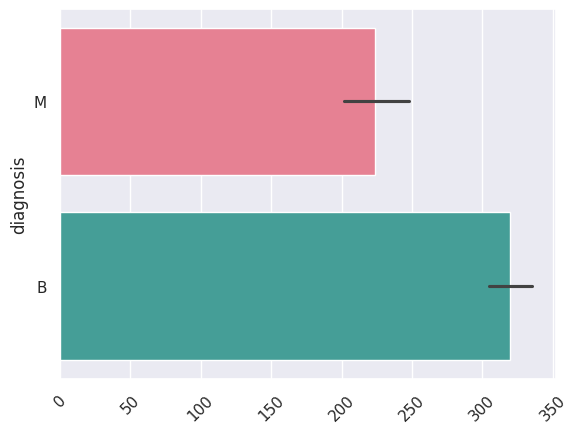

In [ ]:
# Plotting barplot for the diagnosis
sns.barplot(df['diagnosis'], palette='husl')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees (or any angle you prefer)
plt.show()

checking the shape, variability, and center (or median) of a statistical dataset of features for each mean, standard error, and worst.

In [ ]:
# Split dataset into each _mean, _se, and _worst.
mean_features = df.loc[:, df.columns.str.contains('_mean')]
se_features = df.loc[:, df.columns.str.contains('_se')]
worst_features = df.loc[:, df.columns.str.contains('_worst')]

Represent the data distribution and check distribution-skewness for each feature.

In [ ]:


def plot_distributions(features_df):

    num_features = len(features_df.columns)
    rows = (num_features + 1) // 2  # Calculate rows based on features
    fig, ax = plt.subplots(rows, 2, figsize=(15, rows * 4))  # Adjust height dynamically

    # Flatten the axes array for easier indexing
    ax = ax.flatten()

    for idx, feature in enumerate(features_df.columns):
        # Distribution plot
        sns.histplot(features_df[feature], bins=20, kde=True,
                     label=f'Skewness: {features_df[feature].skew():.2f}',
                     ax=ax[idx])
        ax[idx].legend(loc='upper right')
        ax[idx].set_title(f"Distribution of {feature}")

    # Remove unused subplots
    for i in range(num_features, len(ax)):
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()


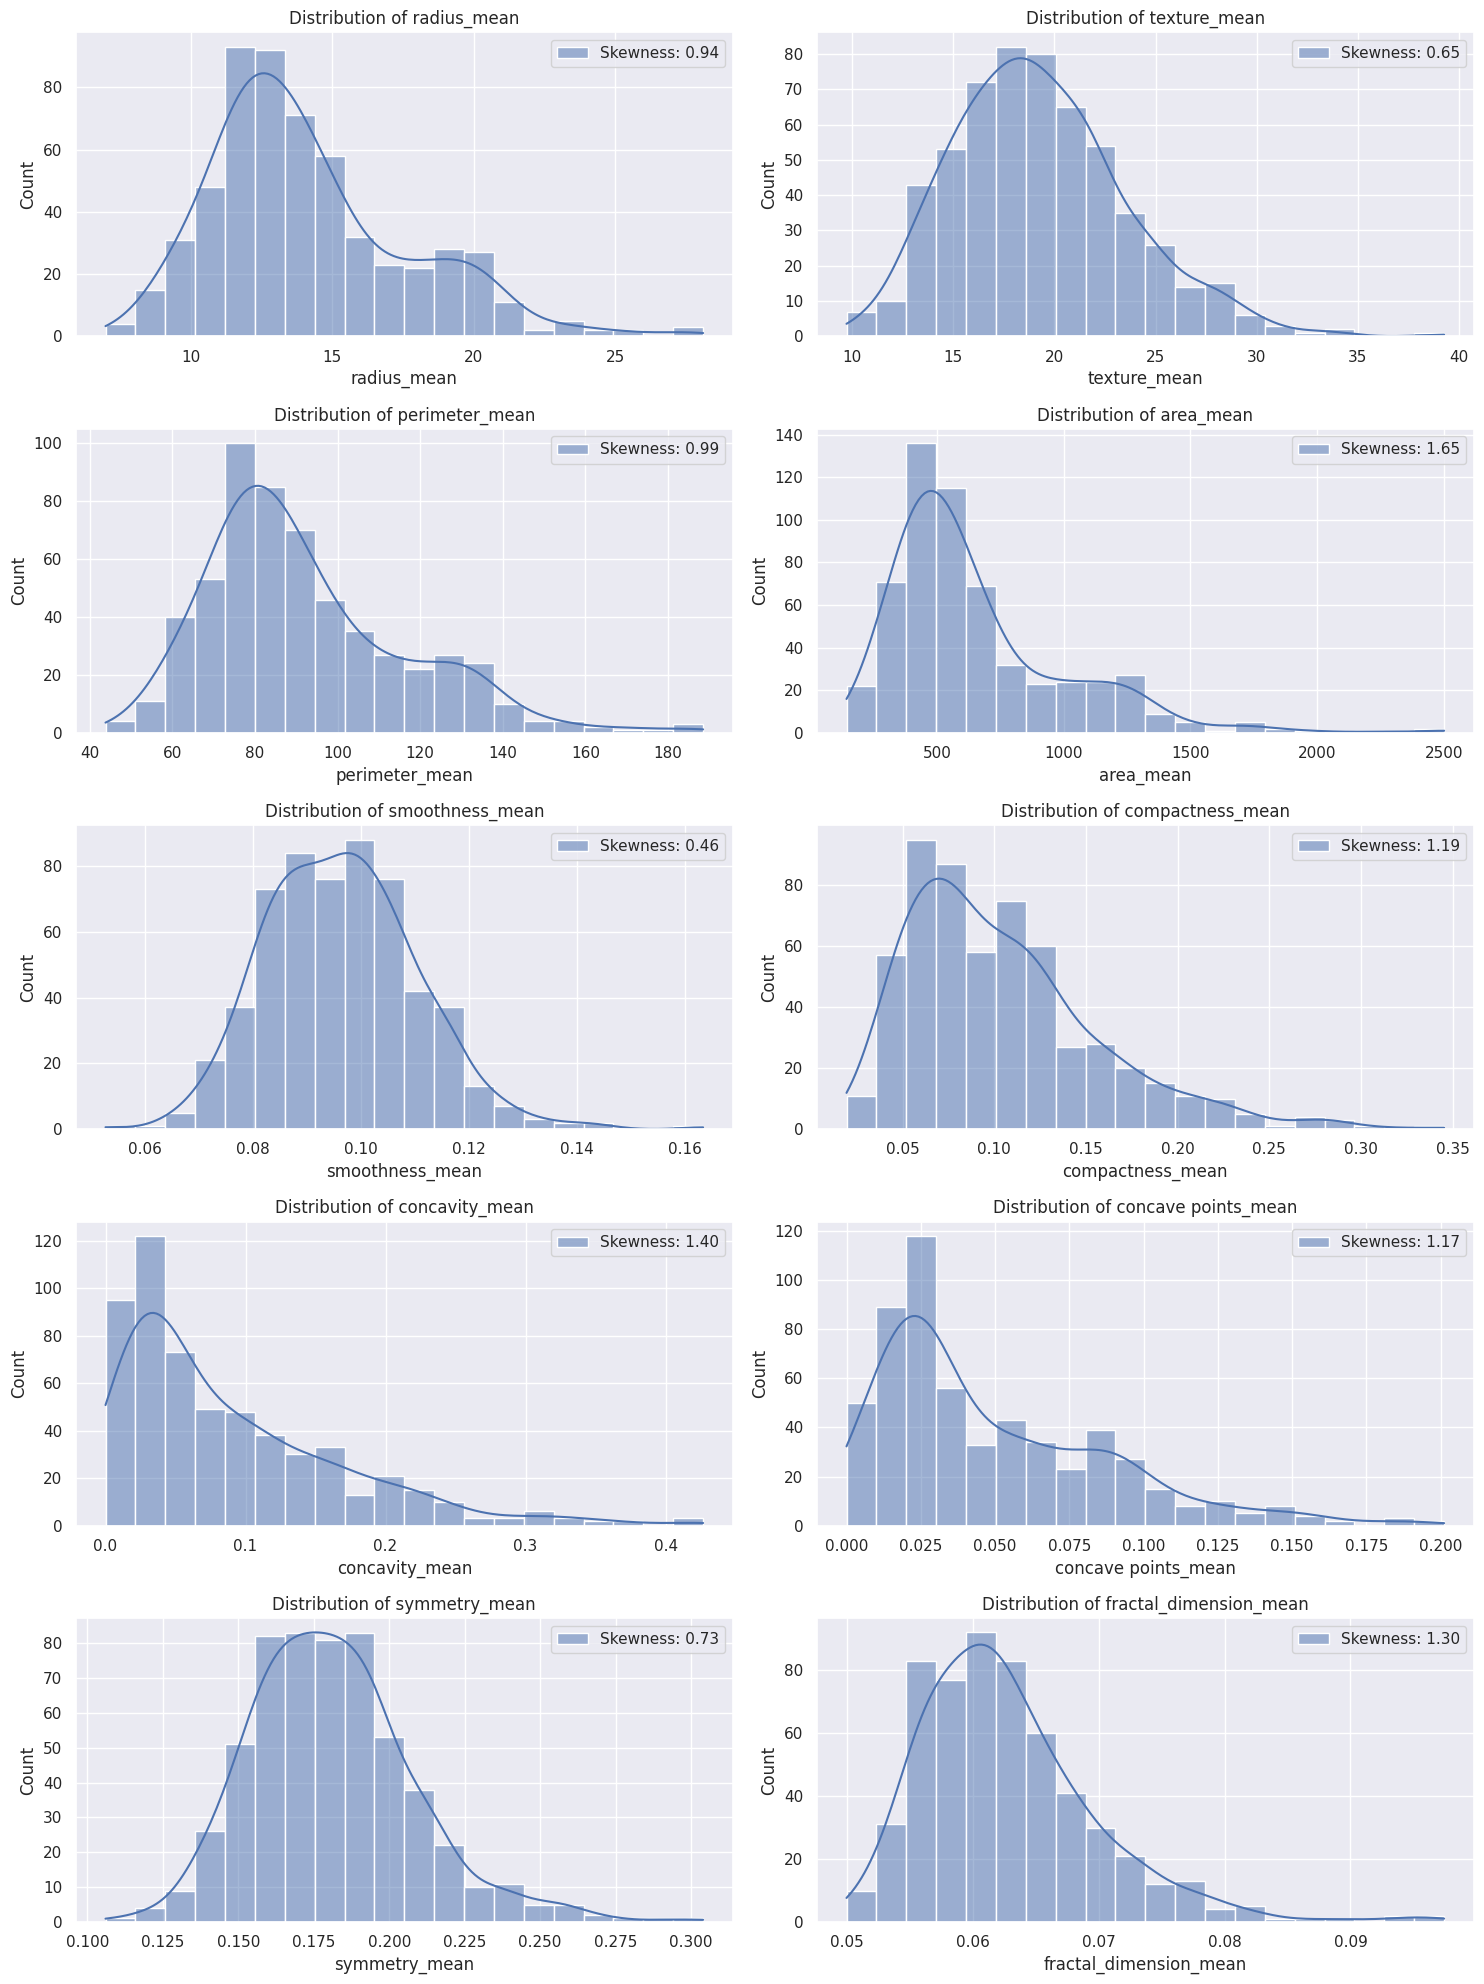

In [ ]:
plot_distributions(mean_features);

Standard Error (SE)
(standard deviation of the means)

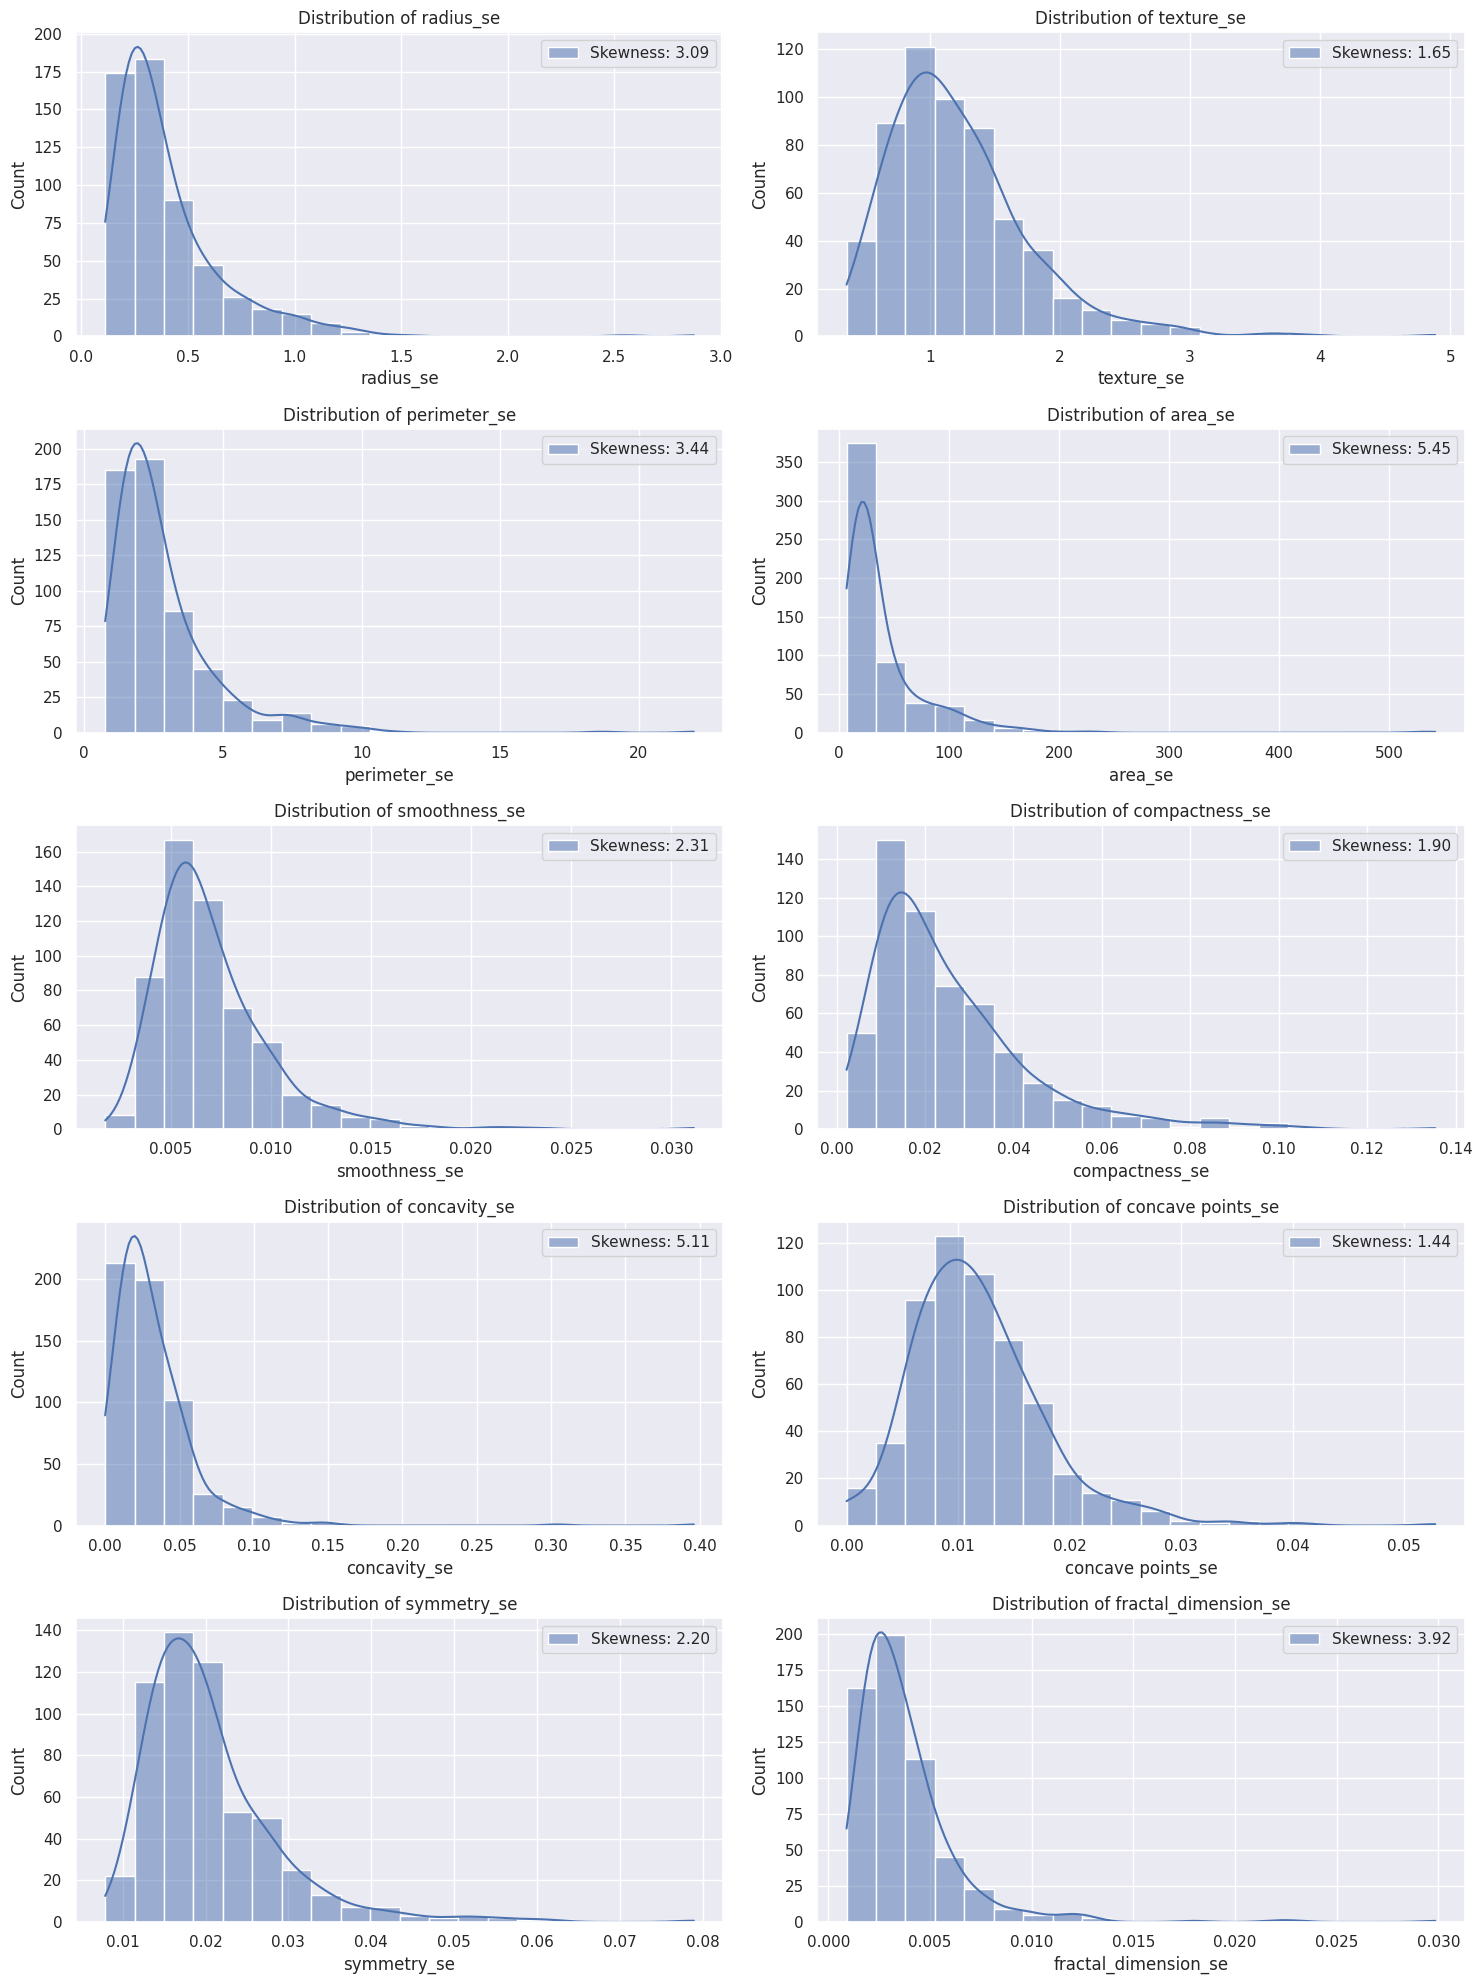

In [ ]:
plot_distributions(se_features);

checking the Worst

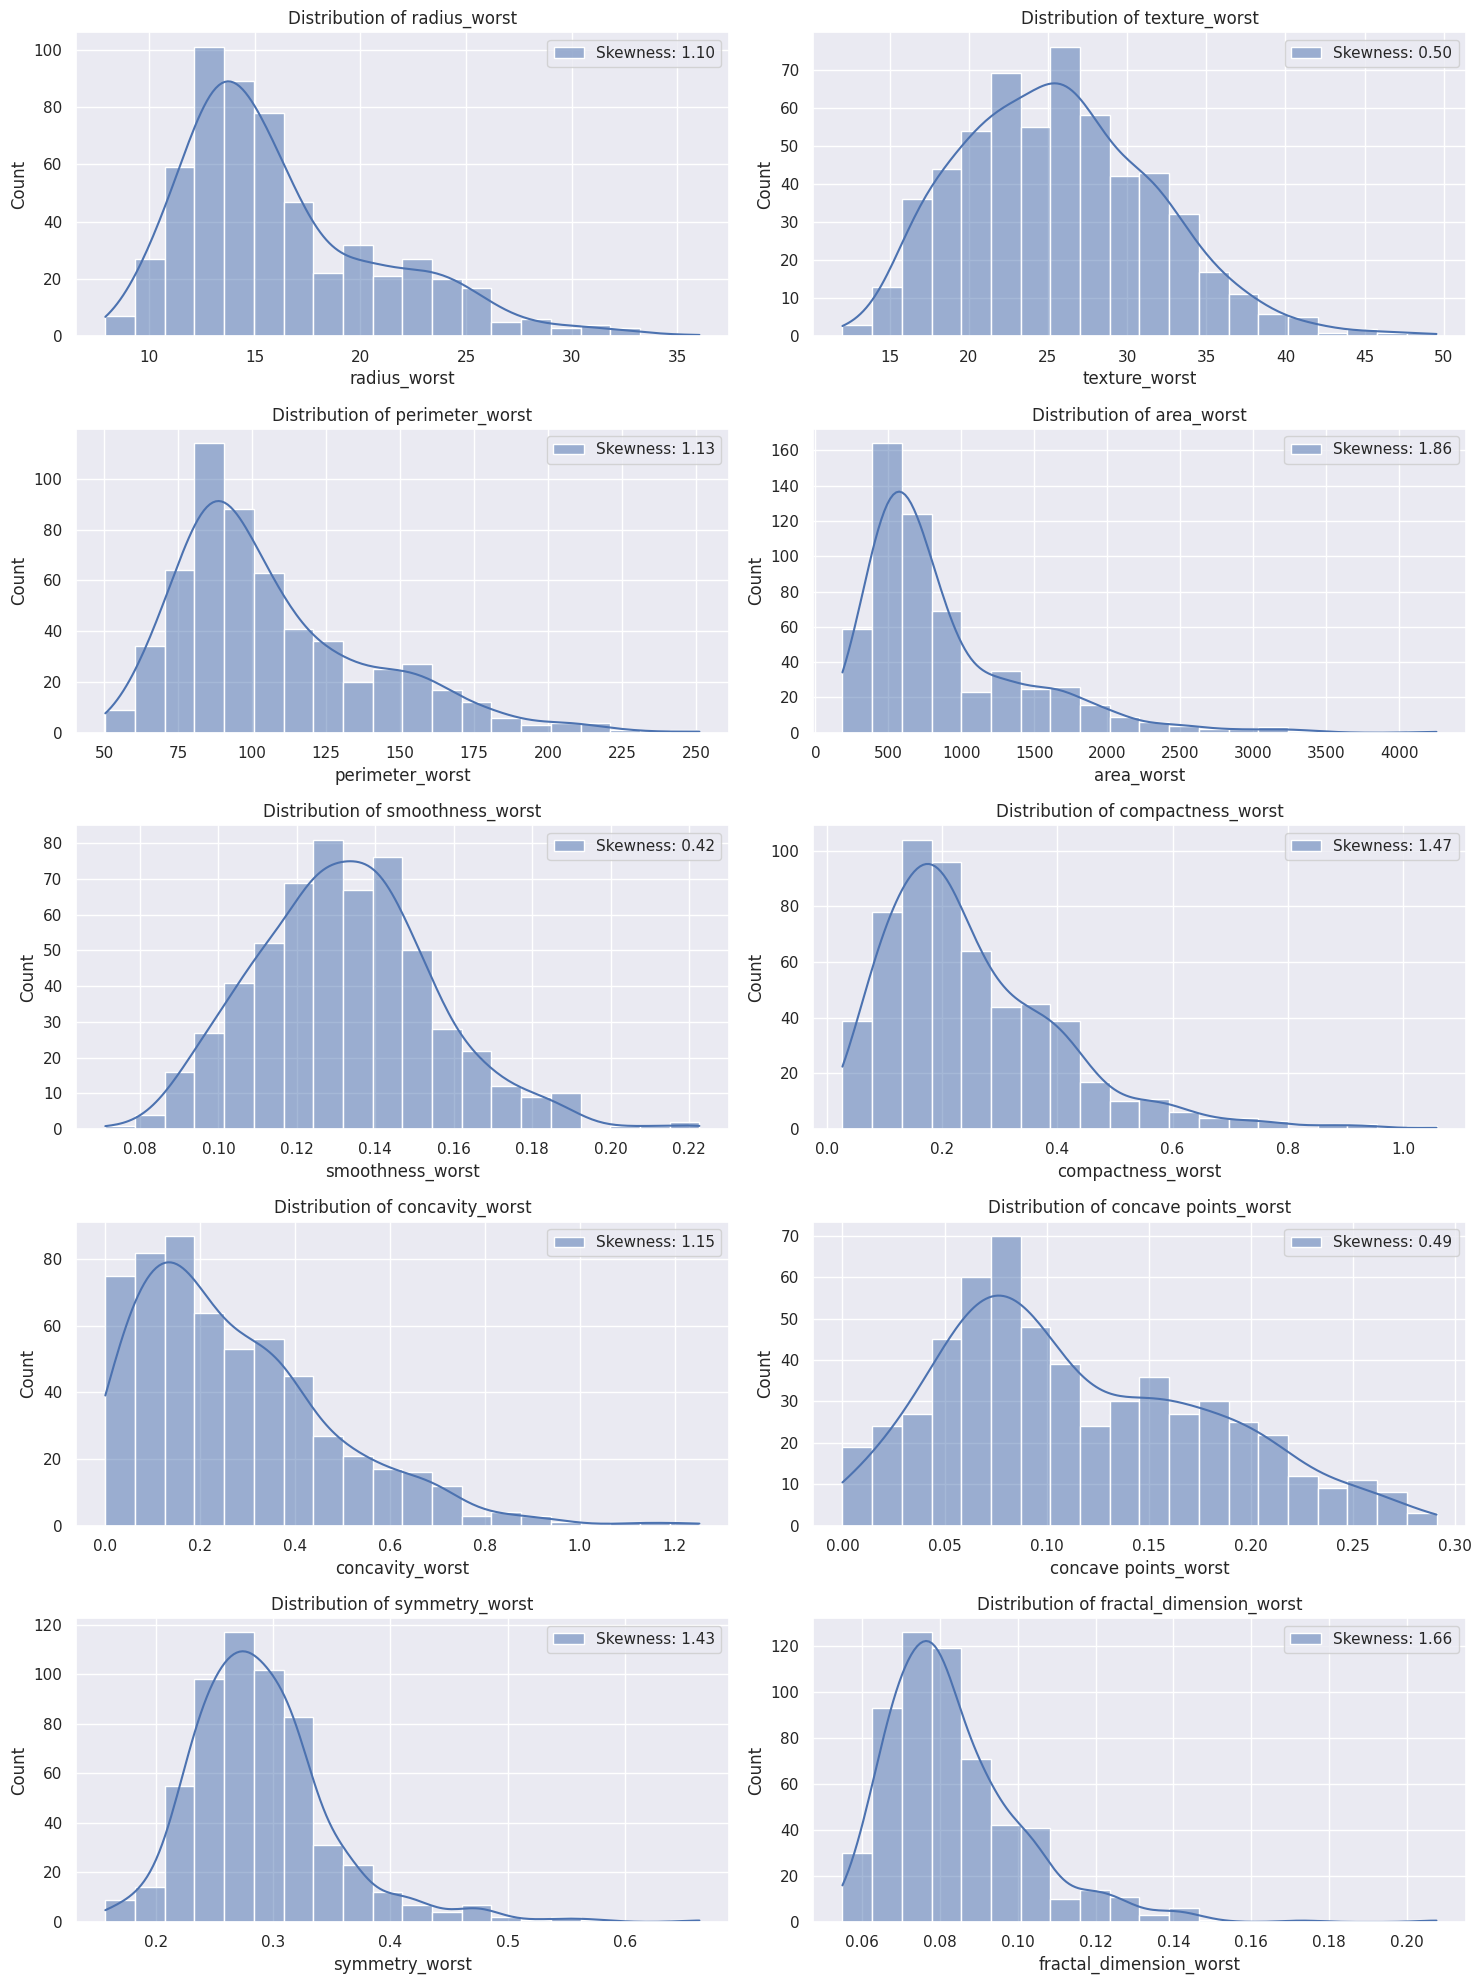

In [ ]:
plot_distributions(worst_features);

#**Data preprocessing** (Clean and Preapre the Data)

In [ ]:
# Drop unecessary columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
df.shape

(569, 31)

In [ ]:
#checking the null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Count total missing values in the entire dataset

In [ ]:
print(df.isnull().sum().sum())

0


Check if any null values exist

In [ ]:
print(df.isnull().values.any())


False


label encoding :
encode the categorical value into numberical one to transform a non-numerical label to a numerical label.

In [ ]:

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
#Correlation
corr_matrix = df.corr()
corr_matrix['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64

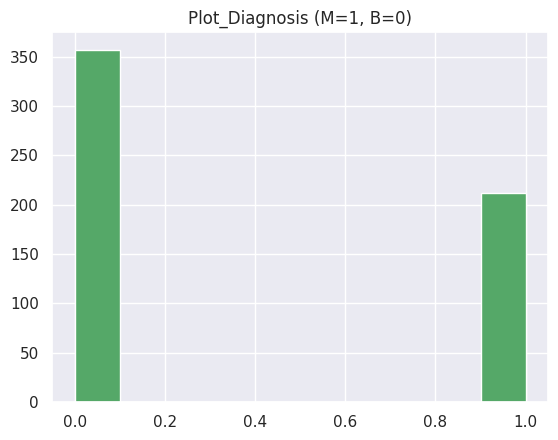

In [ ]:
plt.hist(df['diagnosis'], color='g')
plt.title('Plot_Diagnosis (M=1, B=0)')
plt.show()

<Axes: >

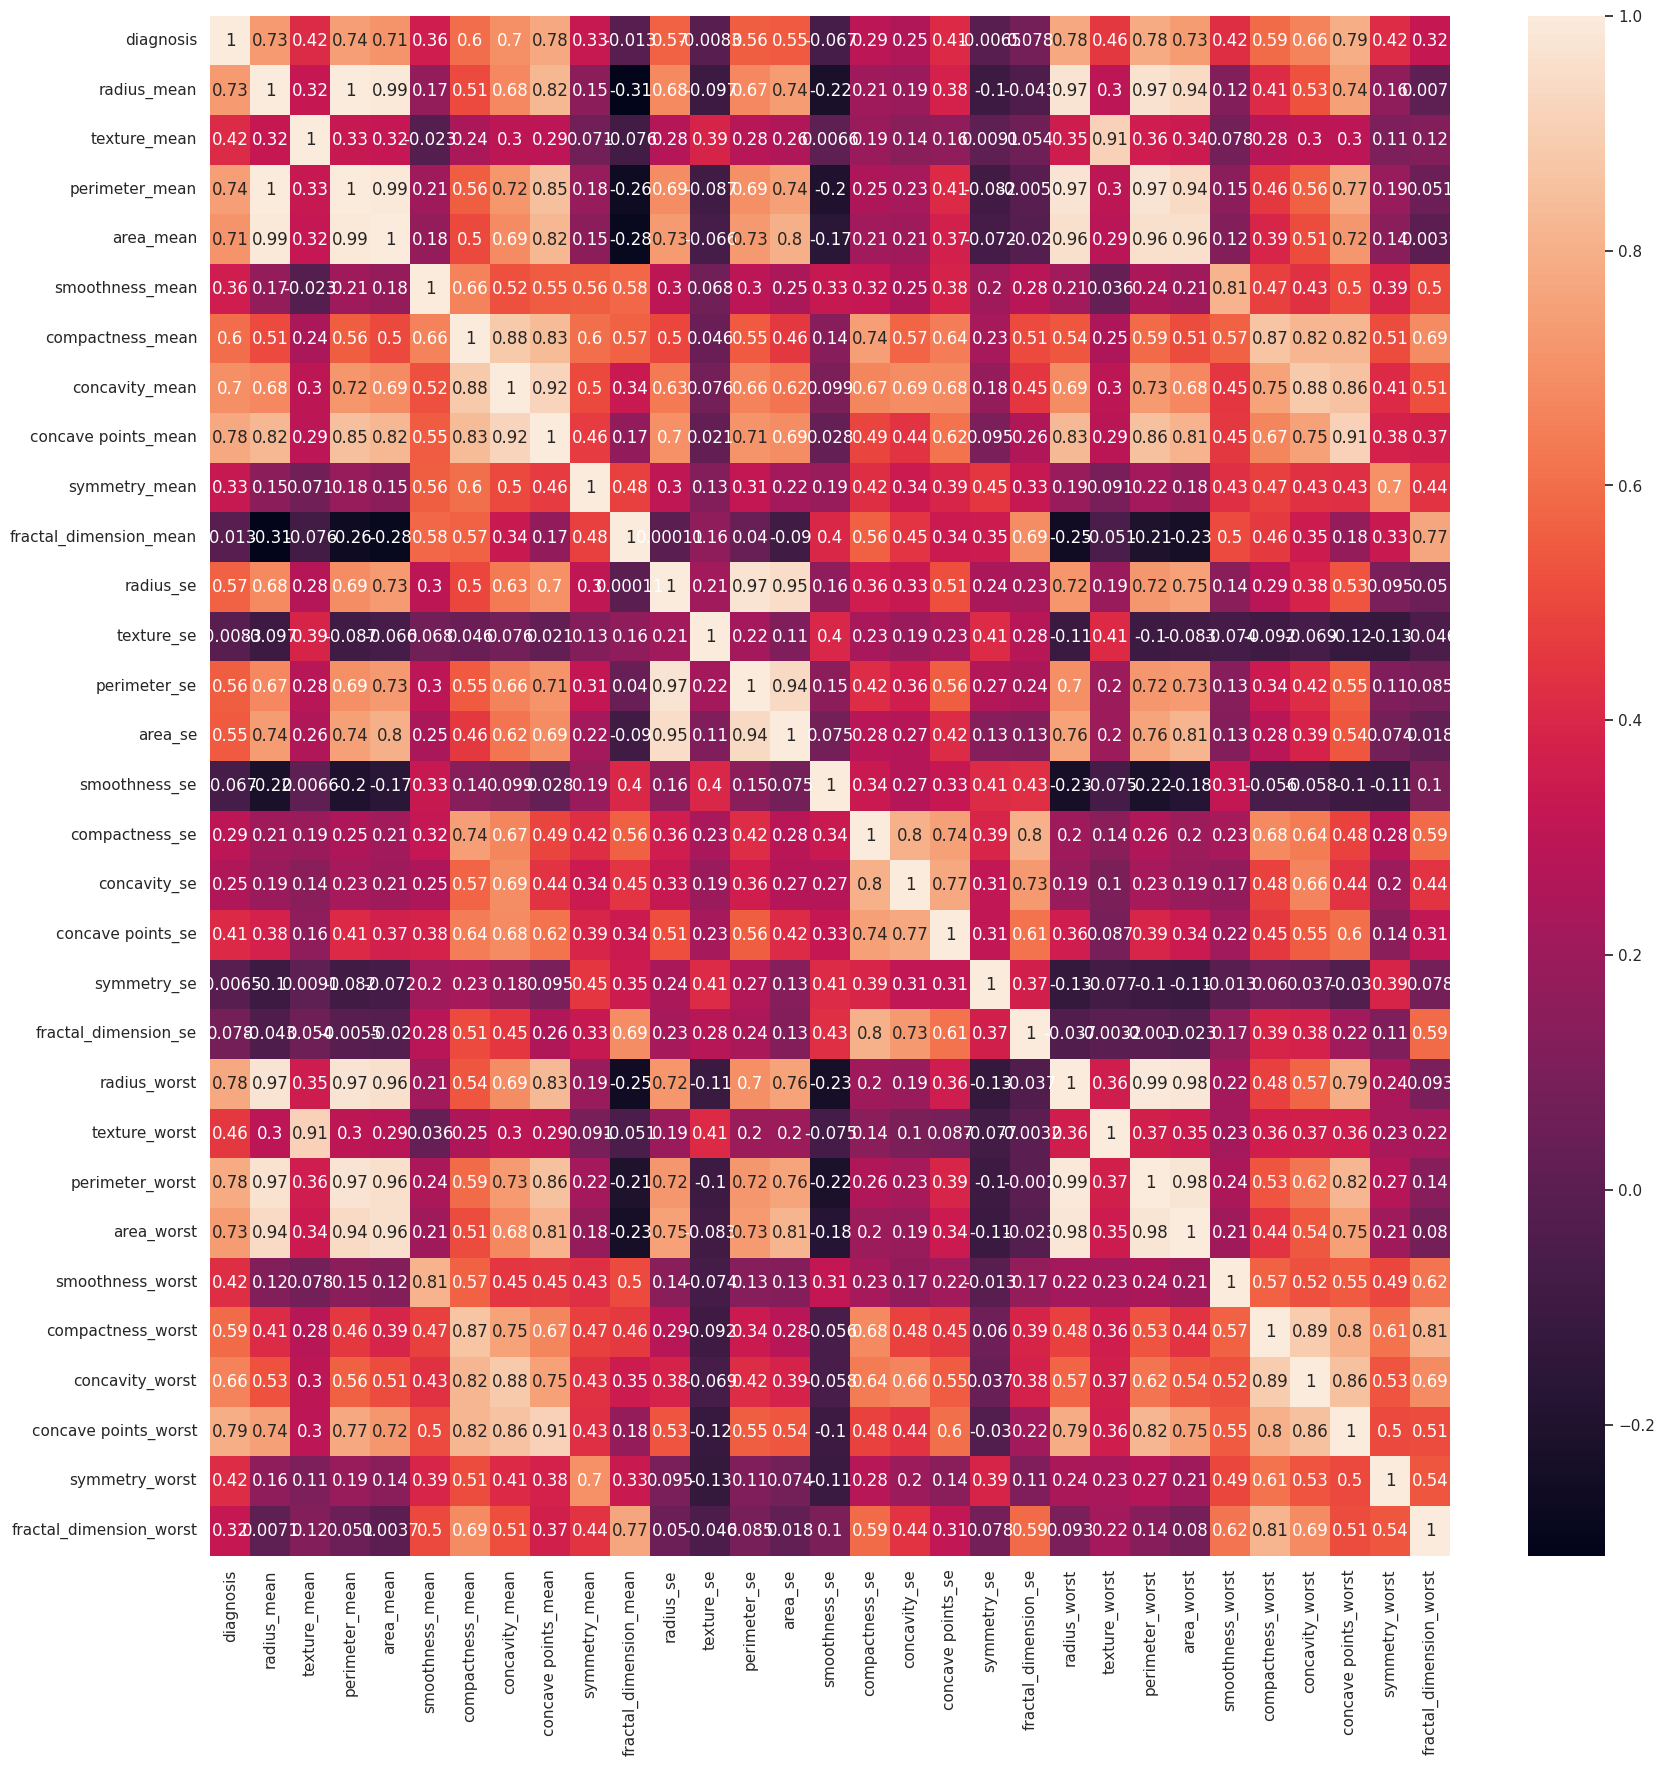

In [ ]:
#Plotting the heat map
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

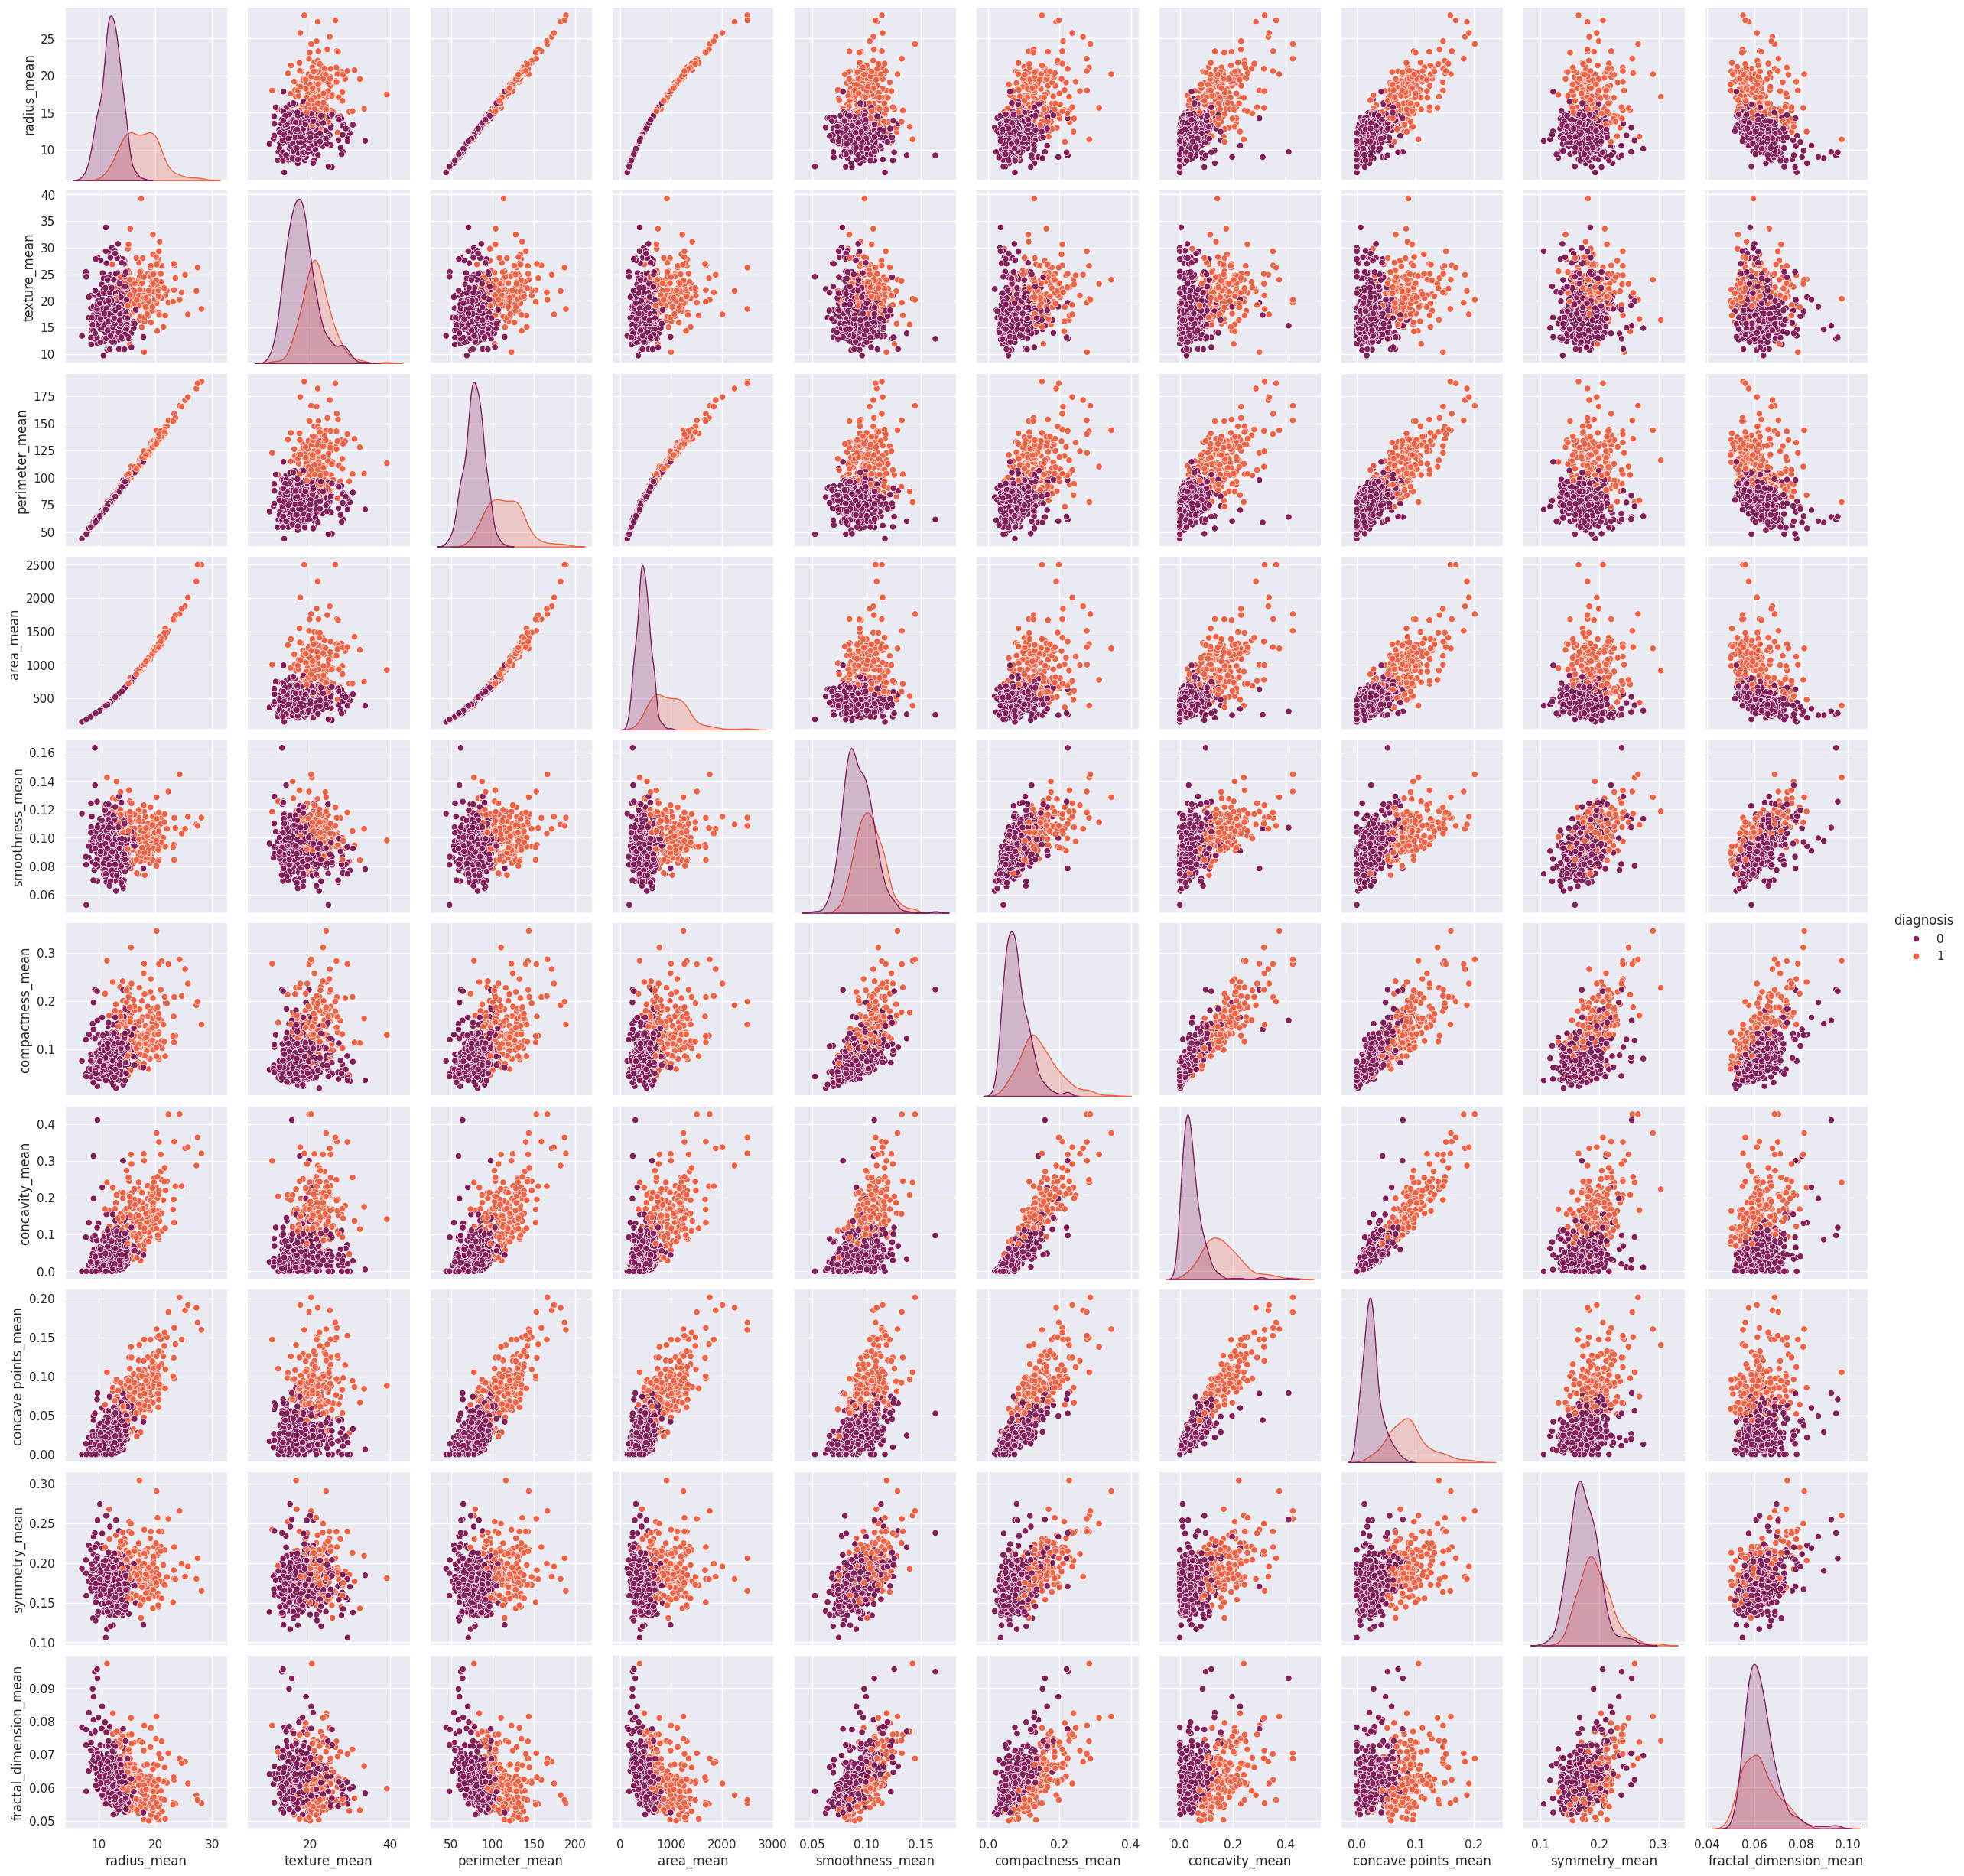

In [ ]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')

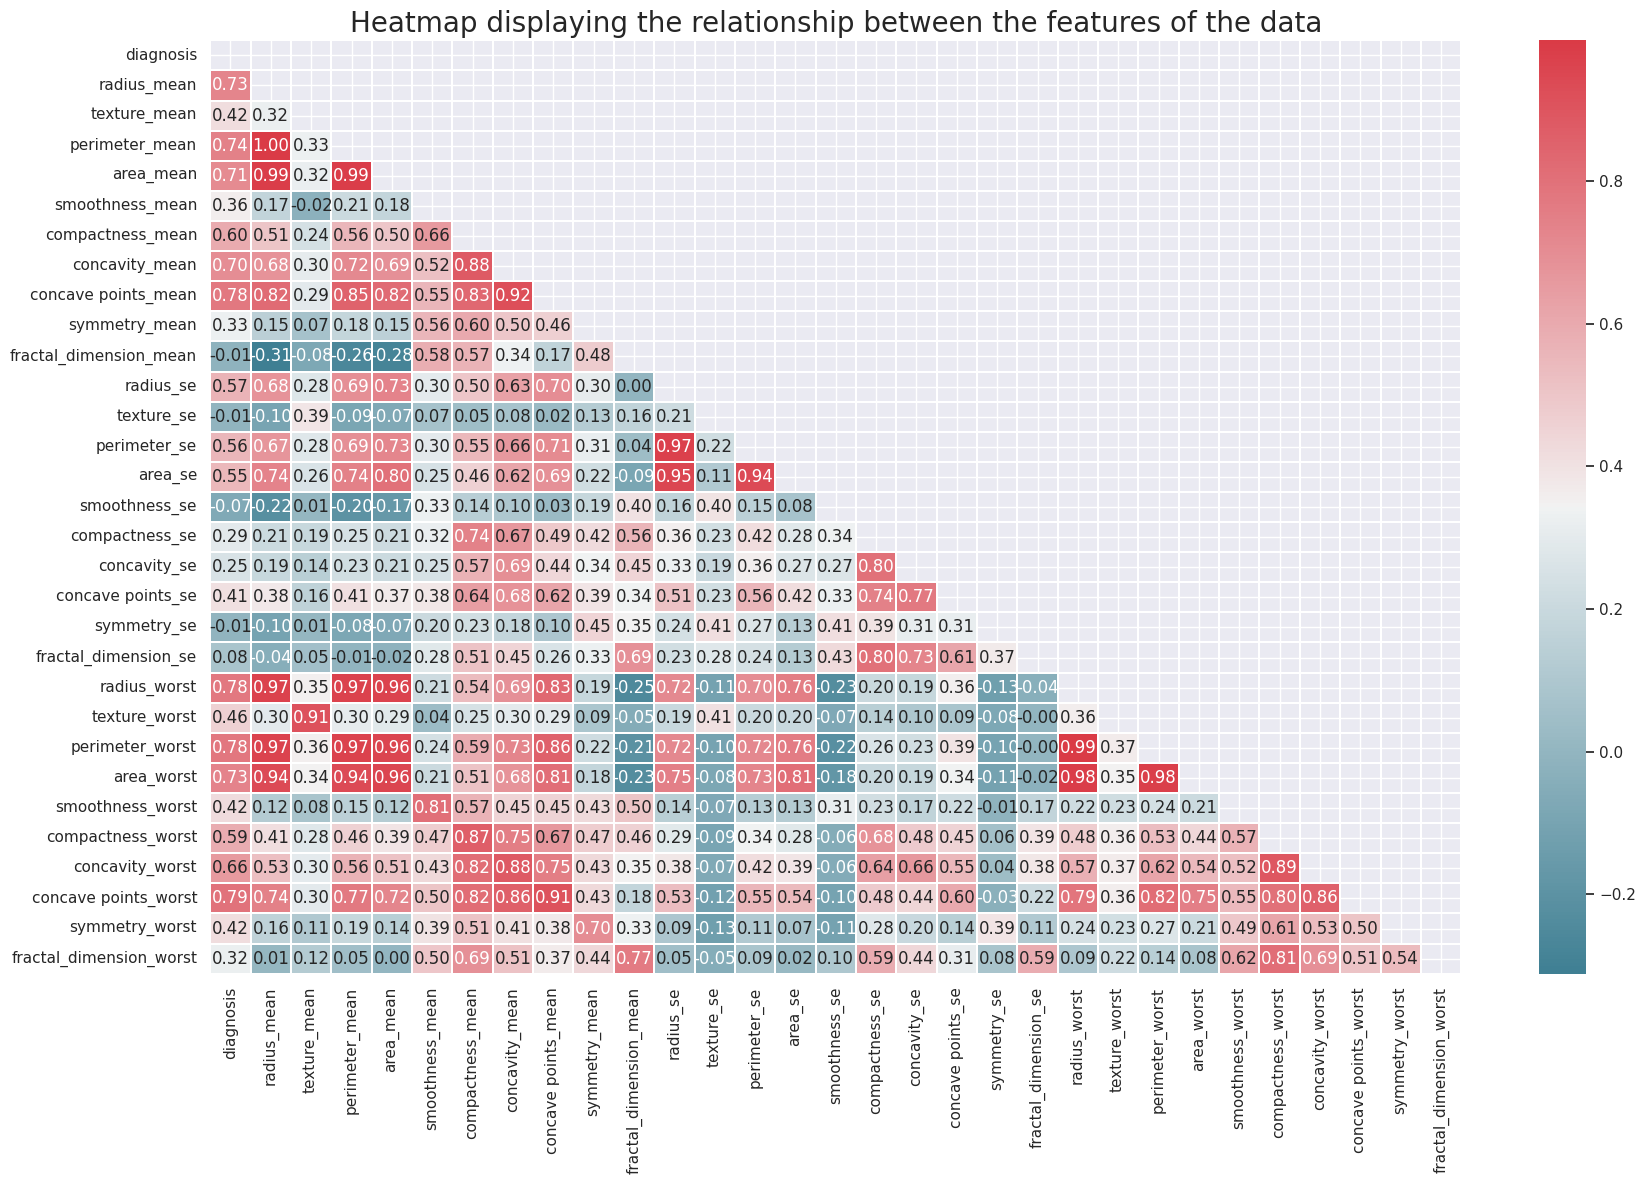

In [ ]:
def correlation_heatmap(data):
    plt.figure(figsize=(18,12))
    corr = data.corr(method='pearson')
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', linewidth=0.2, mask=mask)
    plt.title('Heatmap displaying the relationship between the features of the data',
              fontsize=20)
    plt.tight_layout()
    plt.show()


correlation_heatmap(df);

we can verify the presence of the multicollinearity between some of the variables. for instance, the radius_mean column has a correlation of 1 and  0.99 with perimeter_mean and area_mean columns, respectively. This is because the three columns essentially contain the same information, which is the physical size of the observation(the cell)
Therefore we should onlypic ONE of the three columns whe we go into further analysis.

Another place where multicollienarity is apparent is between the "mean" columns and the "worst" column.


also there is multicollinearity between the attributes compactness concavity and concave points. so we can choose just ONE out of these. i am going for Compactness.

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.92)
len(set(corr_features))

8

In [ ]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst'}

In [ ]:
df = df.drop(corr_features,axis=1)

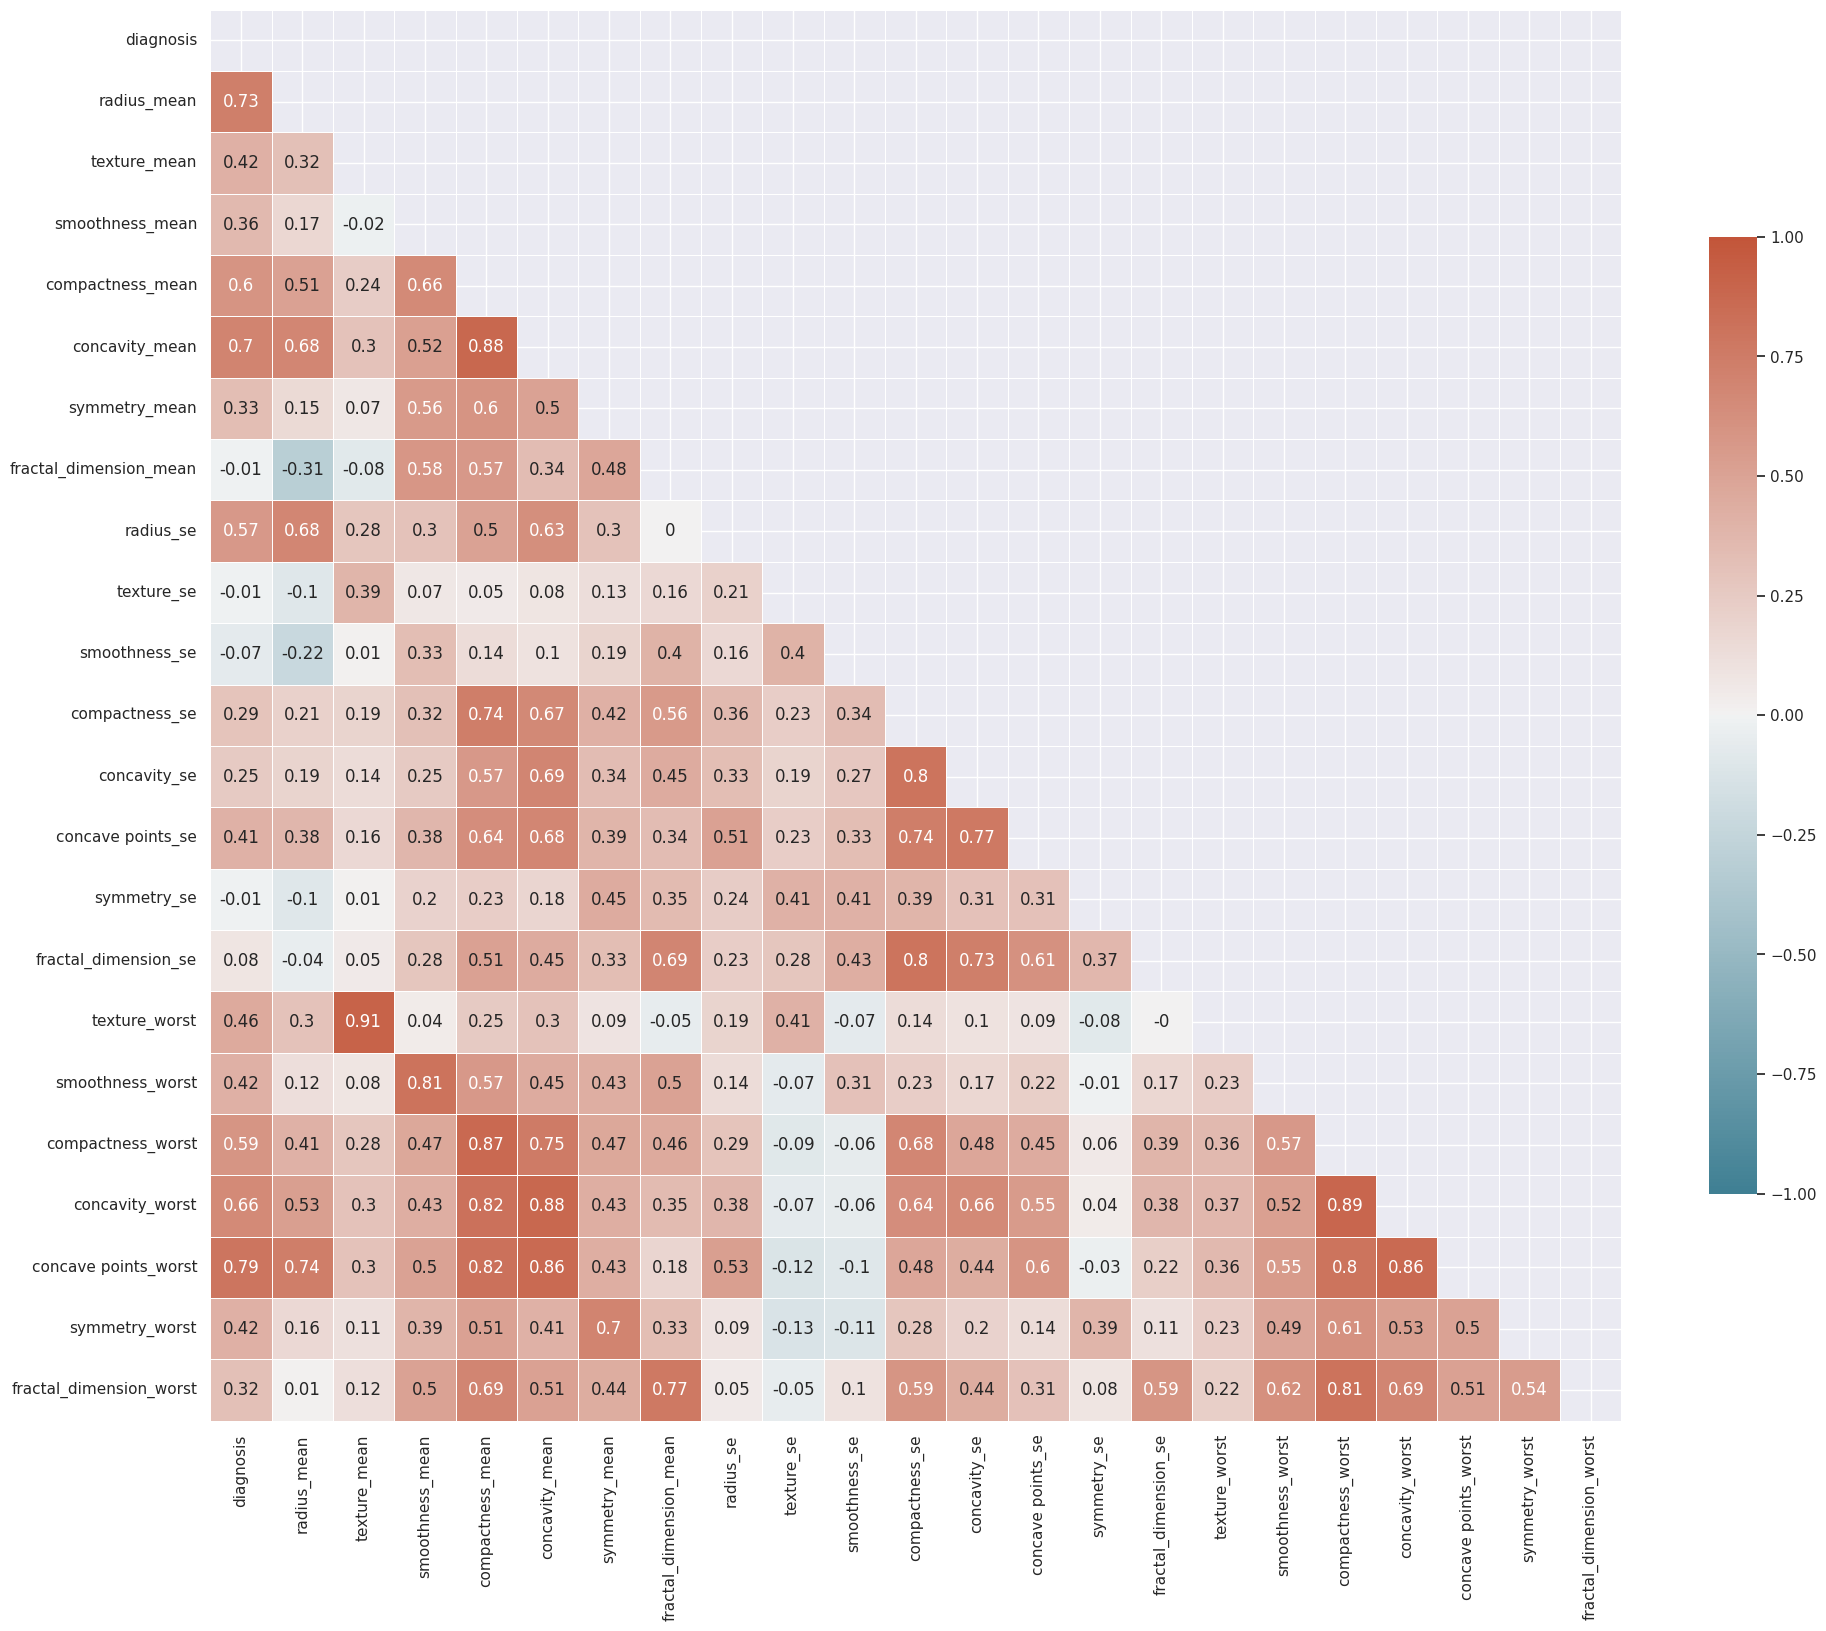

In [ ]:
# # Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

#**Building Models**

In [ ]:
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

Feature Scaling

In [ ]:
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

#Logistic Regression

In [ ]:
#Model Trainning
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)


0.9649122807017544

In [ ]:
#Training accuracy
prediction_train = model1.predict(X_train)  # Predictions on the training set
training_accuracy = accuracy_score(y_train, prediction_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9849246231155779


In [ ]:
#Testing accuracy

accuracy = accuracy_score(y_test, prediction1)
print("Testing Accuracy:", accuracy)


Testing Accuracy: 0.9649122807017544


##Logistic Regression Evaluation

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,prediction1)
cm

array([[111,   4],
       [  2,  54]])

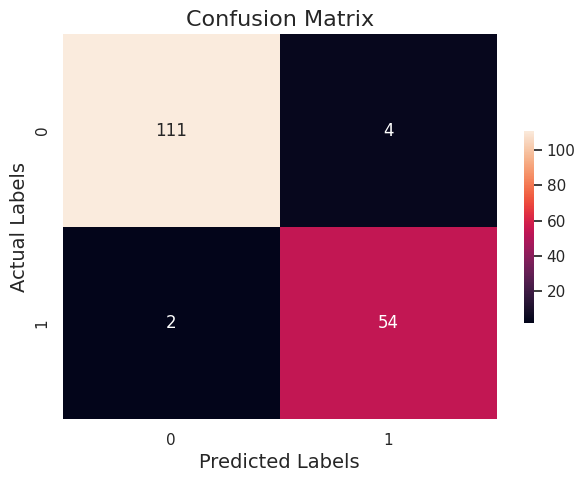

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar_kws={'shrink': .5})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.show()

 Checking the accuracy using the confusion matrix

In [ ]:
  #Checking the accuracy using the confusion matrix
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))


Testing Accuracy: 0.9649122807017544


In [ ]:
#checking accuracy using accuracy_score method
lr_accuracy = accuracy_score(y_test,prediction1)
lr_accuracy

0.9649122807017544

In [ ]:
#Generate the classification report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.93      0.96      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171



 ROC and AUC in Logistic Regression model

In [ ]:
def plot_roc_auc(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label=label % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.savefig('Log_ROC')
    plt.show()

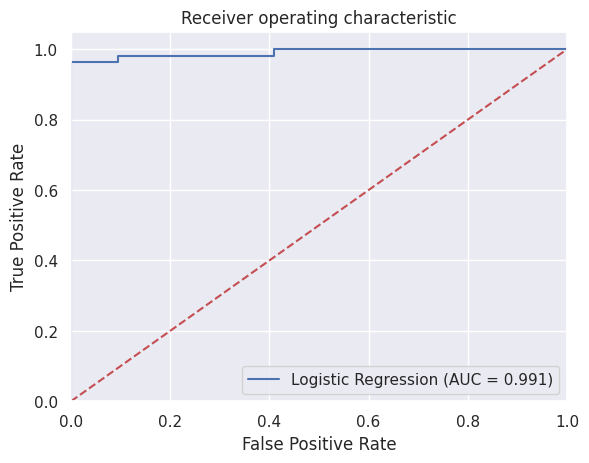

In [ ]:
plot_roc_auc(lr, X_test, y_test, label='Logistic Regression (AUC = %0.3f)')


##Random Forest

In [ ]:

# Use RandomizedSearchCV to hyperparameter tunning

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,
                                   n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and evaluate
best_rfc = random_search.best_estimator_
prediction2 = best_rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, prediction2)
print("Tuned Random Forest Accuracy:", accuracy_rfc)





Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Random Forest Accuracy: 0.9766081871345029


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [ ]:
#Confusion Matrix for the RFC
accuracy_score(y_test,prediction2)
cm2 = confusion_matrix(y_test, prediction2)
cm2

array([[112,   3],
       [  1,  55]])

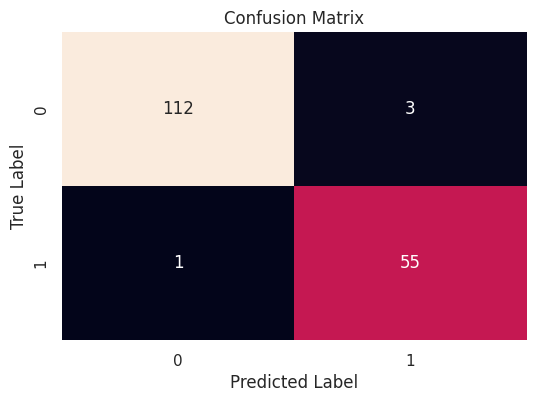

In [ ]:
#Plot the confusion matrix for the Random forest classifier
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cbar=False)  # Change 'cmap' for different colors
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

plotting the roc auc for the rfc

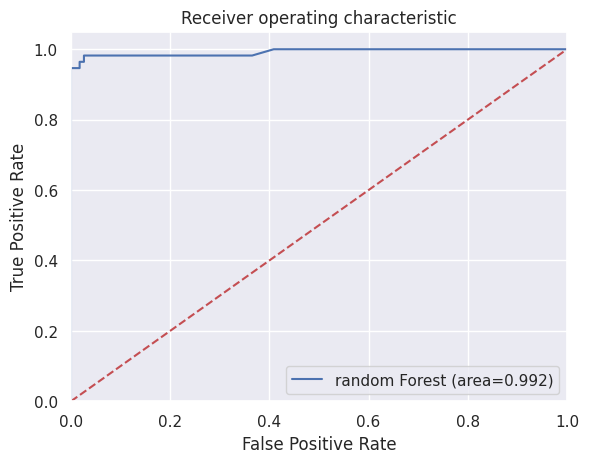

In [ ]:
plot_roc_auc(best_rfc, X_test, y_test, label='random Forest (area=%0.3f)');

##Random Forest Model Evaluation

In [ ]:
#Testing Accuracy
rfc_accuracy = accuracy_score(y_test, prediction2)
rfc_accuracy

0.9766081871345029

In [ ]:
#Generating the classification report
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



#Evaluation of Logistic Regression and Random Forest Classifier

In [ ]:
print(classification_report(y_test, prediction1))
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.93      0.96      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



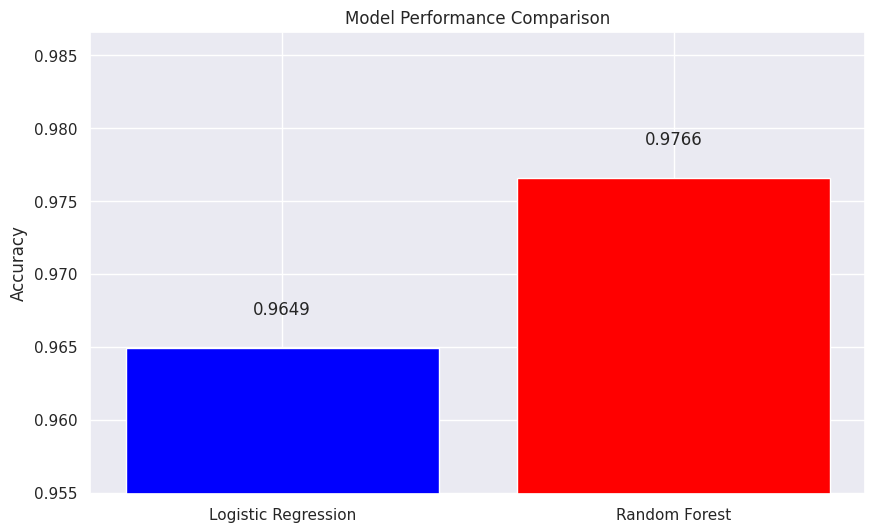

In [ ]:
# Create a bar graph for accuracy comparison
model_names = ['Logistic Regression', 'Random Forest']
accuracies = [lr_accuracy, rfc_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')

# Set y-axis range to zoom in on differences
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)  # Add small padding above and below

# Add accuracy values above the bars for clarity
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.002, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
lr_probs = model1.predict_proba(X_test)[:, 1]
rfc_probs = best_rfc.predict_proba(X_test)[:, 1]

In [ ]:
lr_probs = model1.predict_proba(X_test)[:, 1]
rfc_probs = best_rfc.predict_proba(X_test)[:, 1]

In [ ]:
lr_roc = roc_auc_score(y_test, lr_probs) * 100  # Convert to percentage
rfc_roc = roc_auc_score(y_test, rfc_probs) * 100

In [ ]:
lr_roc

99.09937888198756

In [ ]:
rfc_roc

99.23136645962732

In [ ]:
lr_accuracy_percentage = accuracy_score(y_test, prediction1) * 100  # Convert to percentage
rfc_accuracy_percentage = accuracy_score(y_test, prediction2) * 100
lr_accuracy_percentage


96.49122807017544

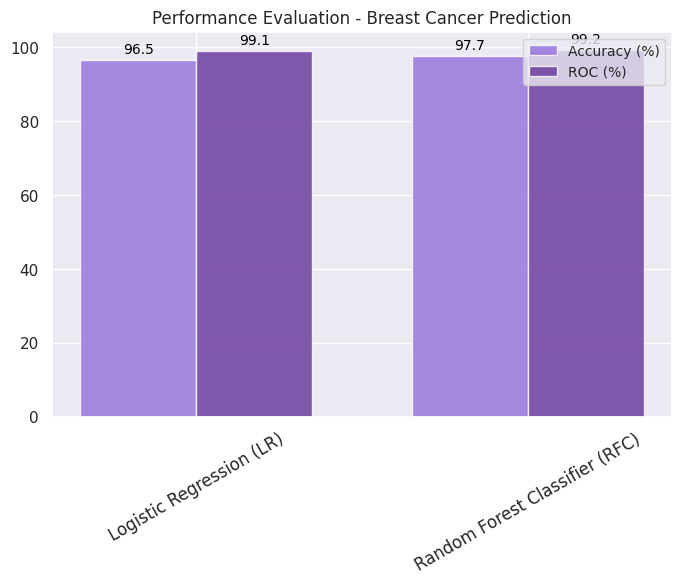

In [ ]:
# Define models and performance metrics
models = [{'label': 'Logistic Regression (LR)'}, {'label': 'Random Forest Classifier (RFC)'}]

# Combine data into lists
means_accuracy = [lr_accuracy_percentage, rfc_accuracy_percentage]
means_roc = [lr_roc, rfc_roc]

# Define the number of groups
n_groups = len(models)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35  # Adjust bar width if needed
opacity = 0.8

# Bar plots for accuracy and ROC AUC
rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity,
                 color='rebeccapurple',
                 label='ROC (%)')

# Add annotations to the bars
for i, (acc, roc) in enumerate(zip(means_accuracy, means_roc)):
    plt.text(index[i], acc + 1, f'{acc:.1f}', ha='center', va='bottom', fontsize=10, color='black')  # Accuracy
    plt.text(index[i] + bar_width, roc + 1, f'{roc:.1f}', ha='center', va='bottom', fontsize=10, color='black')  # ROC

# Plot settings
plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, [m['label'] for m in models], rotation=30, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

# Adjust y-axis limits dynamically
plt.ylim(0, max(max(means_accuracy), max(means_roc)) + 5)

# Save the plot
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

#**Conclusion**

In this study, we developed a breast cancer prediction model using Logistic Regression and Random Forest Classifier (RFC). The models were evaluated using various metrics such as **accuracy, confusion matrices, classification reports, and ROC-AUC scores.**

1. Logistic Regression:


*   Accuracy: 96.49%

*   Confusion Matrix:
    *   True Positives: 111
    *   True Negatives: 54
    *   False Positives: 4
    *   False Negatives: 2



*   Classification Report:
    *   Precision: 0.98 for class 0 and 0.93 for class 1
    *   Recall: 0.97 for class 0 and 0.96 for class 1
    *   F1-score: 0.97 for class 0 and 0.95 for class 1

*   ROC-AUC: 99.10%

2. Random Forest Classifier:


*   Accuracy: 97.66%

*   Confusion Matrix:
    *   True Positives: 112
    *   True Negatives: 55
    *   False Positives: 3
    *   False Negatives: 1



*   Classification Report:
    *   Precision: 0.99 for class 0 and 0.95 for class 1
    *   Recall: 0.97 for class 0 and 0.98 for class 1
    *   F1-score: 0.98 for class 0 and 0.96 for class 1


*   ROC-AUC: 99.23%

Both models performed well in predicting breast cancer, with the Random Forest Classifier slightly outperforming Logistic Regression in terms of accuracy, ROC-AUC, and F1-scores. The Random Forest model demonstrated higher robustness and predictive power, especially in handling imbalanced datasets, as seen in its improved recall and lower false-negative rate for the malignant class (class 1).

Given the high accuracy and AUC scores, the Random Forest Classifier is recommended for applications requiring higher precision and recall in breast cancer prediction tasks. Future work could explore optimizing the models further or incorporating additional features to enhance predictive performance.





























#**References**

1. https://archive.ics.uci.edu/dataset/14/breast+cancer
2. https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
5. https://stackoverflow.com/questions/55381454/scaling-sklearn-randomforestclassifier-for-randomizedsearchcv
6. https://forum.freecodecamp.org/t/create-a-correlation-matrix-using-the-dataset-plot-the-correlation-matrix-using-seaborns-heatmap-mask-the-upper-triangle-the-chart-should-look-like-examples-figure-2-png/416415